## Haar Wavelets

### $L^2([a,b])$
Bevor wir uns mit den eigentlichen Funktionen auseinandersetzen, will ich kurz den 
Raum der quadratisch integierbaren Funktionen definieren und motivieren.

   $\mathcal{L}^2( [a,b] ) := \{ f : [a,b] \rightarrow \mathbb{R} \mid f \text{ ist Lebesque messbar}, 
   \int_a^b |f(x)|^2 \mathrm{d}x < \infty \}.$

Jetzt sorgen wir noch dafür, dass Funktionen als äquivalent angesehen werden, falls sie sich nur
auf einer Nullmenge unterscheiden. Sei als $\mathcal{N} := \{ f \in \mathcal{L}^2([a,b]) \mid \int_a^b f(x)^2 \mathrm{d}x = 0\}$, dann definieren wir den Quotientenvektorraum

$L^2([a,b]) = \mathcal{L}^2 / \mathcal{N}$



(Diese Definition kann auch für allgemeine Maßräume anstatt nur Intervalle verallgemeinert werden.)

### Weshalb interessieren wir uns für den Raum $L^2$? 
Naja, zusammen mit den Skalarprodukt

$\langle f, g \rangle := \int_a^b f(x) \cdot g(x) \mathrm{d}x$

bildet dieser Raum einen Hilbertraum, ist also ein vollständiger Vektorraum mit Skalarprodukt.
Die meisten Funktionenräume wie z.B. die Räume $\mathcal{C}^\infty([a,b])$, $\mathcal{C}^k([a,b])$ bilden nur Banachräume. Dies bringt einige Restriktionen mit sich. Eine der größten Einschränkungen ist sicherlich, dass
Orthogonalität zwischen zwei Vektoren nicht mehr so einfach zu definieren ist. Für die Approximation
ist ein Orthogonalitätsbegriff aber wichtig.


### Die Haar-Wavelets als Basis

Nun sind die komischen eckigen Haar Wavelets etwas mehr als nur orthogonal, diese
bilden sogar eine Basis vom Raum $L^2([a,b])$.
Das liefert uns die Möglichkeit Numerik zu betreiben!

Der Beweis dafür ist etwas technisch, aber im wesentlichen können wir mit den Haar-Wavelets schnell
sehen, dass diese mit endlichen Linearkombinationen folgenden Raum aufspannen:

$\{ f : [a,b] \rightarrow \mathbb{R} \mid f \text{ ist stückweise konstant und hat endlich viele Sprungstellen welche alle eine Potenz von } \frac12 \text{ sind.} \}$

Danach wäre nur noch zu zeigen, dass dieser Raum dich in $L^2([a,b])$ liegt, das erfordert jedoch ein wenig
Wissen aus der Maßtheorie.

### Weitere Eigenschaften

Ich habe selbst leider wenig mit Wavelets zu tun, aber es gibt wohl eine sehr mächtige Wavelet-Transformation,
welche ähnlich wie die Fourier-Transformation z.B. in der Signalverarbeitung hilft und auch ansonsten tolle Eigenschaften hat. Hier will ich aber nur auf die Approximation mit Haar-Wavelets eingehen, was ein eher kleiner Teil der Wavelet Analysis ist.


#### Infos zum IPython Notebook...

Die meisten Zeilen hier sind für euch uninteressant.
Geht einfach zu den Plots und schaut euch den darüber stehenden Text an...

In [53]:
from numpy import *
from __future__ import unicode_literals
import matplotlib.pyplot as plt
plt.xkcd()
%matplotlib inline

In [54]:
a = 0
b = 1

def Φ(x):
    return array( ((a <= x) & (x <= (a+b)/2.)) , int32 ) - array(((a+b)/2. < x ) & (x <= b),int32)

def ϕ(j,i,x):
    if j >= 0 :
        return sqrt(2**(j)) * Φ( 2**j * x - i )
    else:
        return ones( shape=x.shape )
    
def supp(j,i):
    return (i/2.**j, (i+1)/2.**j)

# Plots der Basisfunktionen

Die erste Basisfunktion ist speziell, diese ist die konstante Funktion mit Wert 1 (J=-1).

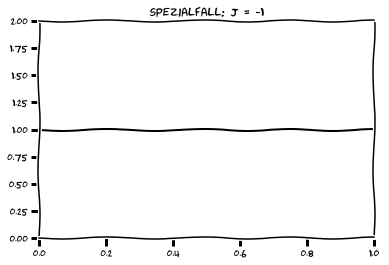

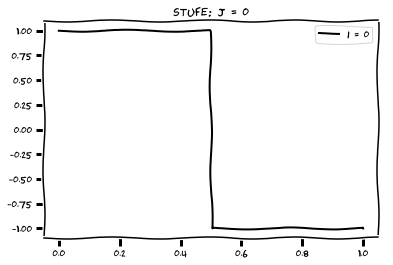

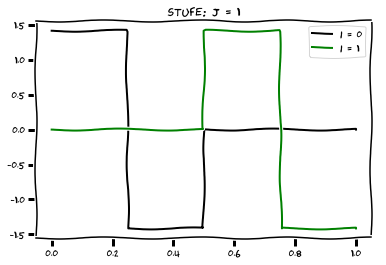

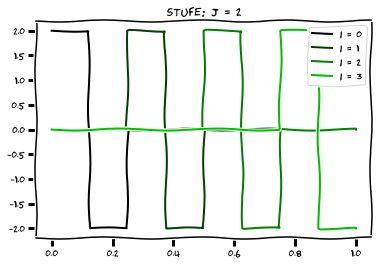

In [55]:
x = linspace(a,b,200)


plt.title('Spezialfall: j = -1')
plt.plot(x,ϕ(-1,0,x),'k')
plt.axis([0,1,0,2])
plt.show()

for j in range(0,3):
    for i in range(0,2**j):
        plt.plot( x , ϕ(j,i,x) , color=[0.,i/(2.**j),0], label='i = %d' % i)
    plt.legend()
    plt.title('Stufe: j = %d'%j)
    plt.show()

# Warum können Stufenfunktionen erzeugt werden?

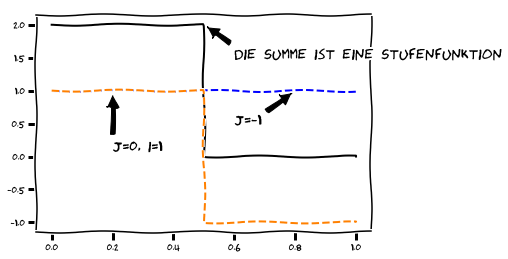

In [59]:
# Erzeugung von stückweisen Sprungfunktionen

x = linspace(a,b,200)

plt.plot( x , ϕ(-1,0,x) + ϕ(0,0,x) , color=[0,0,0])
plt.plot( x , ϕ(-1,0,x)            , '--' , color=[0.,0,1] )
plt.plot( x ,             ϕ(0,0,x) , '--' , color=[1,0.5,0] )

plt.annotate('Die Summe ist eine Stufenfunktion', xy=(0.5, 2), xytext=(0.6, 1.5),
            arrowprops=dict(facecolor='black',shrink=0.1),size=15
            )
plt.annotate('j=0, i=1', xy=(0.2, 1), xytext=(0.2, 0.1),
            arrowprops=dict(facecolor='black',shrink=0.1),size=15
            )

plt.annotate('j=-1', xy=(0.8, 1), xytext=(0.6, 0.5),
            arrowprops=dict(facecolor='black',shrink=0.1),size=15
            )

plt.show()

# Approximation von Funktionen

Wir nehmen uns nun eine beliebige Funktion $f$ und versuchen diese zu approximieren.

Text(0.5,1,'f(x)')

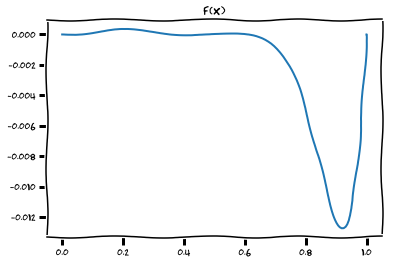

In [109]:
f = lambda x: sin(2*pi*x)*x**2*(x-0.5)**4
x = linspace(a,b,200)
plt.plot(x,f(x))
plt.title("f(x)")

# Implementierung

Um wirklich $f$ zu approximieren
müssen wir die Koeffizienten ausrechnen, also Skalarprodukte:
$ c_{j,i} = \langle f , \phi_i^j \rangle$

Die Approximation ist dann

$ \tilde{f} = c_{-1} \phi^{-1}_0 + \sum_{j=0}^{m} \sum_{i=0}^{2^j-1} c_{ji} \phi_i^j$

Diese sind aber wiederum selbst Integrale. Analytisch kein Problem, aber numerisch
bedeutet dies, dass wir erstmal mit Quadraturformeln rechnen müssen.

Ich habe hier nun einmal eine naive Quadratur mit äquidistanten Stützpunkten
und einmall Legendre-Gauss Quadratur angewendet.
Aus meiner Sicht immer wieder bemerkenswert ist, wie einfach und kurz solche Implementierungen sind,
sobald die Stützstellen und Gewichte bekannt sind. In den meisten Programmiersprachen gibt es Bibliotheken
welche die Stützstellen und Gewichte für euch berechnen, daher ist die Quadratur hier in drei Zeilen implementiert.

### Wahl des Integrationsbereiches

Es lohnt sich, bei der Berechnung von $c_{j,i}$ wirklich nur über den Support $supp( \phi_i^j)$ zu integrieren!





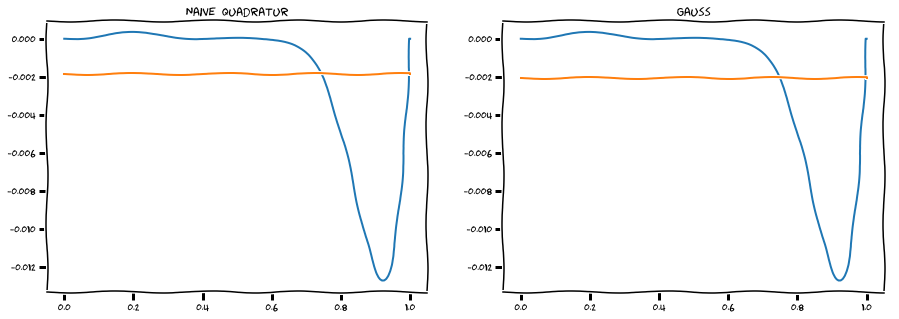

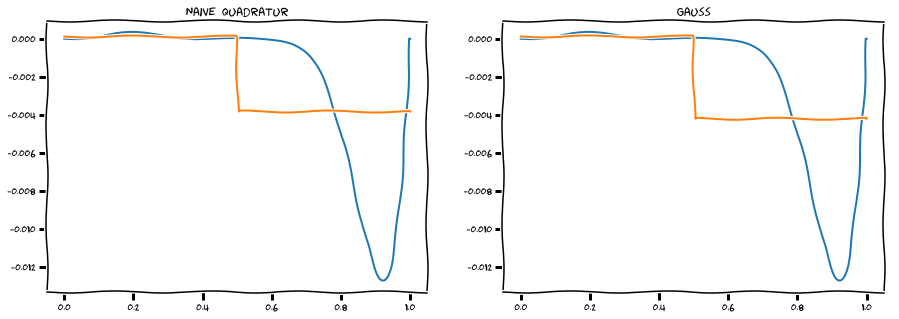

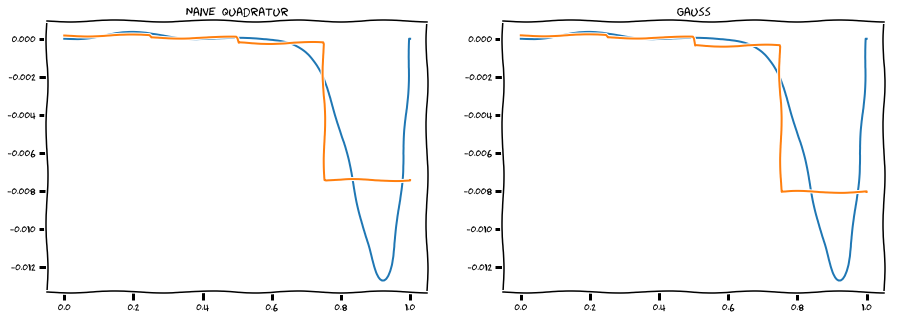

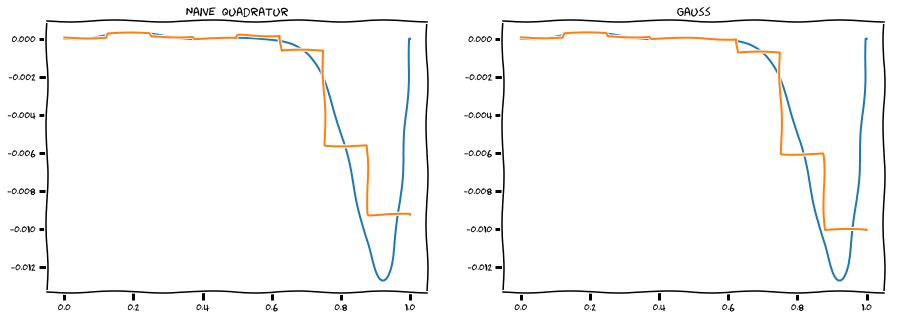

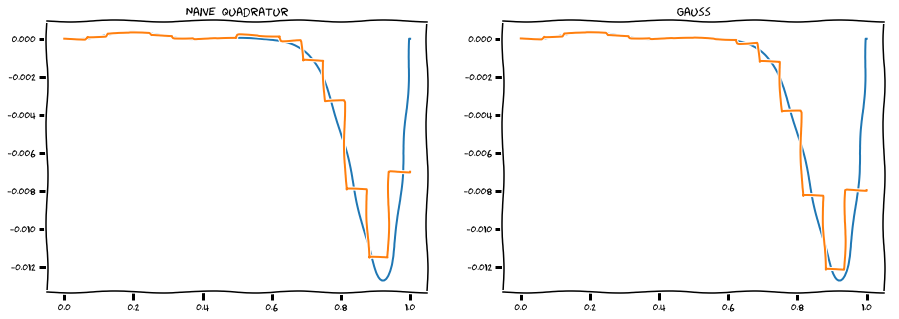

In [110]:
# Approximations
from numpy import polynomial

def naive_quadrature(a1, a2, g, n ):
    p = linspace(a1,a2,n)
    return sum(g(p))*(a2-a1)/n
    
    
def legendre_gauss_quadrature(a1, a2, g, deg):
    # Berechnung der Stützstellen (x) und Gewichte (w)
    x, w = polynomial.legendre.leggauss(deg)
    
    # Transformation auf das Interval [a1,a2]
    t = 0.5*(x + 1)*(a2 - a1) + a1
    return sum(w * g(t))   *0.5*(a2 - a1)


def approximate( stage, g, m̃, integration_method,degree,ax):
    
    # Plot der Funktion
    points = linspace(a,b,2**(stage+1)+1)
    points = points[1:-1]    
    ax.plot(x,f(x))
    
    # stage j = -1
    coef = []
    coef.append( integration_method(a,b, lambda z : ϕ(-1,0,z)*g(z) , degree ) )
    
    
    #stage j >= 0
    for j in range(0,stage):
        for i in range(0,2**j):
            s = supp(j,i)
            coef.append(integration_method(s[0],s[1], lambda z : ϕ(j,i,z)*g(z) , degree ))

    if m̃ < len(coef):
        cutoff = partition(absolute(coef), -m̃)[-m̃]  
    else:
        cutoff = 0
    
    approx = zeros( shape=x.shape)
    k = 0
    if abs(coef[k]) >= cutoff:
        approx += coef[k] * ϕ(-1,0,x)
    
    k = 1
    for j in range(0,stage):
        for i in range(0,2**j):
            if abs(coef[k]) >= cutoff:
                approx += coef[k] * ϕ(j,i,x)
            k += 1
    
    ax.plot(x,approx)
    #ax.plot(points,f(points),'k*',markersize=5)

    
m̃ = infty

for stage in range(0,5):
    fig, axarr = plt.subplots(1,2,figsize=(15,5))
    
    # Linker Plot      
    approximate(stage, f, m̃, naive_quadrature, 20 , axarr[0])
    axarr[0].set_title("Naive Quadratur")  
    
    
    # Rechter Plot    
    approximate(stage, f, m̃, legendre_gauss_quadrature, 20, axarr[1])
    axarr[1].set_title("Gauss")
    

### Kommentar zum Ergebnis

Die Naive Quadratur bekommt in höheren Auflösungen leichte Probleme, hier müsste
die Anzahl an Stützstellen erhöht werden.

Insgesamt finde ich beide Approximationen aber recht gut.

# Approximation mit den größten Koeffizienten

Nun ist die Idee in der Summe

$ \tilde{f} = c_{-1} \phi^{-1}_0 + \sum_{j=0}^{m} \sum_{i=0}^{2^j-1} c_{ji} \phi_i^j$

nur die Terme zu nehmen mit den $\tilde m$ größten Koeffizienten, wir setzen also $c_{ji} = 0$ falls es $\tilde m$ betragsmäßig größere Koeffizienten gibt.

Text(0.5,1,'Die 10 wichtigsten Basisfunktionen')

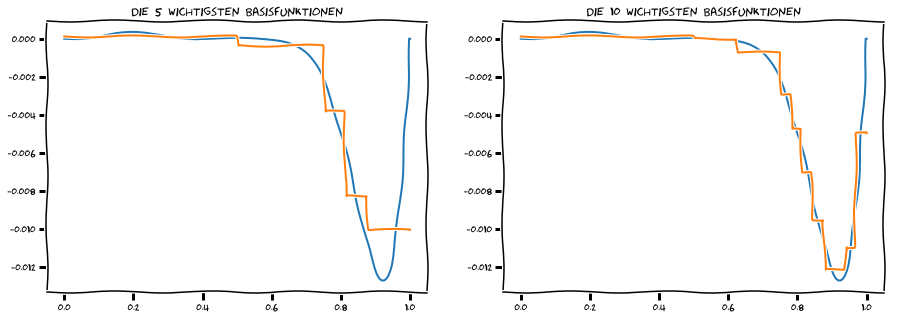

In [112]:
m̃ = 5

stage = 5
fig, axarr = plt.subplots(1,2,figsize=(15,5))

# Linker Plot    
approximate(stage, f, m̃, legendre_gauss_quadrature, 20, axarr[0])
axarr[0].set_title("Die 5 wichtigsten Basisfunktionen")
 
m̃ = 10

# Rechter Plot    
approximate(stage, f, m̃, legendre_gauss_quadrature, 20, axarr[1])
axarr[1].set_title("Die 10 wichtigsten Basisfunktionen")



### Kommentar

Es ist gut ersichtlich, dass durch die Wahl der Koeffizienten nun eine geringere Auflösung 
genutzt wird um den relativ konsanten linken Teil zu approximieren. Rechts wird dafür mit hoher Auflösung approximiert. Dies ist sinnvoll, da hier die Funktion spannende Dinge tut.